In [70]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
data=pd.read_csv('BostonHousing.csv')

In [72]:
pd.read_csv('BostonHousing.csv')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [73]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [74]:
print(data.head(5))

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [75]:
print(np.shape(data))

(506, 14)


In [76]:
print(data.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284341   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.705587   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.884000   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [78]:
linr = LinearRegression()

In [79]:
data['medv'] = np.log1p(data['medv'])

In [80]:
X = data.drop(['medv','b'], axis=1)
Y = data['medv']

In [81]:
print(X)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio  lstat  
0       15.3   4.98  
1       17.8   9.14  
2       17.8   4.03  
3       18.7   2.94  
4       18.7 

In [82]:
print(Y)

0      3.218876
1      3.117950
2      3.575151
3      3.538057
4      3.616309
         ...   
501    3.152736
502    3.072693
503    3.214868
504    3.135494
505    2.557227
Name: medv, Length: 506, dtype: float64


In [83]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.3)

In [84]:
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",x_train.shape)
print("y_train shape:",x_test.shape)

x_train shape: (354, 12)
x_test shape: (152, 12)
y_train shape: (354, 12)
y_train shape: (152, 12)


In [85]:
# linr.fit(x_train, y_train)
from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
x_train_imputed = imputer.fit_transform(x_train)

# Now, you can use X_train_imputed for linear regression
linr.fit(x_train_imputed, y_train)




LinearRegression()

In [89]:
# y_pred = linr.predict(x_test)
from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data
imputer.fit(x_train)

# Transform your test data using the fitted imputer
x_test_imputed = imputer.transform(x_test)

# Now, you can use x_test_imputed for making predictions
y_pred = linr.predict(x_test_imputed)




In [90]:
print(mean_squared_error(y_test, y_pred))

0.03119679048917593


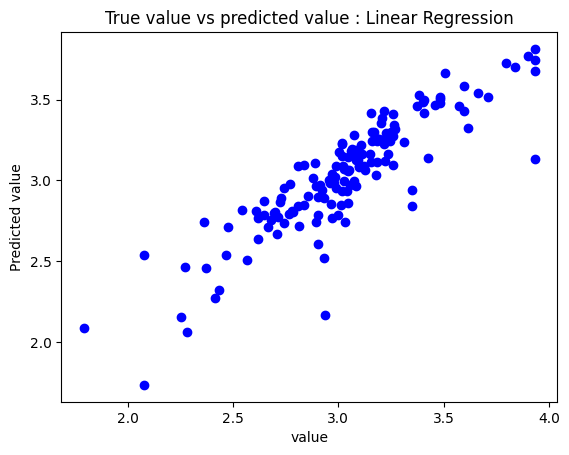

In [91]:
plt.scatter(y_test,y_pred,c ='blue')
plt.xlabel("value")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()